# Exercício de apoio da Semana 8

## Usando k-NN para identificar classes de preços de telefones móveis.

A empresa XCelulares quer entrar no mercado de telefones móveis, mas não sabe como precificar os modelos de aparelhos que pretende criar. A empresa teve acesso a uma base de dados contendo as principais características de vários modelos de telefones, incluindo o seu preço, dividido em quatro faixas de valores. 

Use o algoritmo k-vizinhos mais próximos (k-NN) para criar um modelo de classificação para que a XCelulares consiga classificar os modelos que irá desenvolver nas faixas de preço corretas.

O conjunto de dados para o exercício está na seguinte URL:

https://github.com/higoramario/univesp-com360-mineracao-dados/raw/main/com360-telefones-moveis.csv

Para este exercício, realize as seguintes etapas:

1. Verifique se há dados nulos que precisam ser tratados.
2. Transforme o atributo alvo **price_range** em valores inteiros para poder usar o k-NN.
3. Observe a distribuição das medidas de tendência central e de dispersão dos dados nas colunas.
4. Gere os histogramas dos atributos.
5. Verifique se há a presença de anomalias nos atributos.
6. Separe os dados em 10% para teste e o restante para treinamento.
7. Use o **KNeighborsClassifier**, da biblioteca scikit learn, para classificar os dados. 
8. Use a validação cruzada (**cross_validate**) para treinar o k-NN.
9. Varie os parâmetros de **KNeighborsClassifier** e **cross_validate** e descubra a combinação de valores que obtém a melhor acurácia.
10. Treine o seu modelo com os melhores valores de parâmetros obtidos.
11. Confira qual resultado de acurácia obtido para os dados de teste.

#### Dicas e observações:

1. A classe **KNeighborsClassifier** possui três parâmetros que aceitam valores diferentes. Altere os valores desses três parâmetros e descubra aquele que obtém a melhor acurácia.
* 1.1. importe a biblioteca: **from sklearn.neighbors import KNeighborsClassifier**
* 1.2. crie o modelo do classificador: **knn = KNeighborsClassifier(n_neighbors= 5, weights ='uniform', algorithm='auto')**

* **n_neighbors**: número de vizinhos (k, que recebe valores inteiros)
* **weights**: medida de similaridade, que recebe os valores **'uniform'** ou **'distance'**
* **algorithm**: algoritmo usado pelo k-NN, que recebe os valores **'auto'**, **'ball_tree'**, **'brute'** ou **'kd_tree'**.

2. A validação cruzada pode ser feita usando a função **cross_validate**. Além dos parâmetros do classificador, varie também o número de combinações e descubra aquela que obtém a melhor acurácia.
* 2.1. importe  a biblioteca: **from sklearn.model_selection import  cross_validate** 
* 2.2. exemplo de chamada da função: **validacao_cruzada = cross_validate(knn, atributos_treino, classes_treino, cv=10)**
* 2.3. **cv** é o número de combinações

3. Para ver a acurácia média obtida pela validação cruzada, importe a biblioteca **numpy** e execute o comando **np.mean(validacao_cruzada['test_score'])**

4. Use os melhores valores de **n_neighbors, weights, algorithm e cv** para treinar e testar o modelo:
* 4.1. treinamento: **knn.fit(atributos_treino,classes_treino)** 
* 4.2. teste: **predicao = knn.predict(atributos_teste)**

5. Veja qual resultado de acurácia você obteve usando **accuracy_score**.

6. Se for preciso, consulte o código do tutorial da semana 4 para ver um exemplo de uso de **accuracy_score** e da separação dos dados em treinamento e teste (**train_test_split**).

7. Você pode também consultar a documentação do scikit learn: 
* k-NN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Teste e treinamento: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Validação cruzada: https://scikit-learn.org/0.21/modules/generated/sklearn.model_selection.cross_validate.html
* Acurácia: https://scikit-learn.org/0.21/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
* RandomizedSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

8. Uma forma **alternativa** de testar diferentes valores de parâmetros automaticamente é o código a seguir, usando a classe **RandomizedSearchCV**. Veja um exemplo de código abaixo:

```python
from sklearn.model_selection import RandomizedSearchCV

#lista com valores para os parâmetros n_neighbors, weights e parameters
n_neighbors = [4,5,10,15,20,30,40]
weights = ['uniform' , 'distance']
algorithm = ['auto' , 'ball_tree' , 'kd_tree' ,'brute']
parameters = dict(n_neighbors = n_neighbors, weights = weights ,algorithm = algorithm )

# experimente valores diferentes para o número de combinações (cv)
clf = RandomizedSearchCV(classificadorKNN, parameters, cv = 5, n_iter = 10)
clf.fit(atributos_treino,classes_treino)
print('acurácia: ' , clf.best_score_)
print('melhores parâmetros: ' , clf.best_params_)
print('melhor classificador: ' , clf.best_estimator_)
```

### Descrição dos atributos da base de dados:
* **battery_power**: quantidade de energia armazenada em mili amperes hora (mAh)
* **blue**: bluetooth (sim ou não)
* **clock_speed**: velocidade do microprocessador em giga hertz (GHz)
* **dual_sim**: suporta dois chips (sim ou não)
* **fc**: câmera frontal em mega pixels
* **four_g**: 4G (sim ou não)
* **int_memory**: memória interna em giga bytes
* **m_dep**: profundidade do dispositivo em cm
* **mobile_wt**: peso
* **n_cores**: quantidade de núcleos do processador
* **pc**: câmera principal em mega pixels
* **px_height**: resolução de altura da tela em pixels
* **px_width**: resolução de largura da tela em pixels
* **ram**: memória RAM em mega bytes
* **sc_h**: altura da tela em cm
* **sc_w**: largura da tela em cm
* **talk_time**: tempo de bateria com o telefone em uso realizando chamadas
* **three_g**: 3G (sim ou não)
* **touch_screen**: toque em tela (sim ou não)
* **wifi**: suporte a wi-fi (sim ou não)
* **price_range**: faixa de preços, que pode ser **too-cheap**(muito barato), **cheap** (barato), **fair** (preço justo) ou **expensive**(caro). Este é o atributo de classe.

### Versões das bibliotecas

Esse exercício foi feito usando as seguintes versões de bibliotecas: 

* matplotlib==3.2.2 
* numpy==1.21.6  
* Python 3.7.13  
* pandas==1.3.5 
* scikit-learn==1.0.2 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
telefones = pd.read_csv('https://github.com/higoramario/univesp-com360-mineracao-dados/raw/main/com360-telefones-moveis.csv')

#### Quantidade de objetos na base

In [3]:
len(telefones)

2000

In [4]:
telefones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,cheap
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,fair
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,fair
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,fair
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,cheap


#### 1. Verificando se há campos nulos

In [5]:
telefones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### 2. Transformando os valores do atributo alvo (classe)

In [6]:
telefones['price_range'] = telefones['price_range'].map({'too-cheap':0,'cheap':1,'fair':2,'expensive':3})

In [7]:
telefones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### 3. Verificando medidas de tendência central e dispersão

In [8]:
telefones.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### 4. Verificando a distribuição dos atributos com histogramas

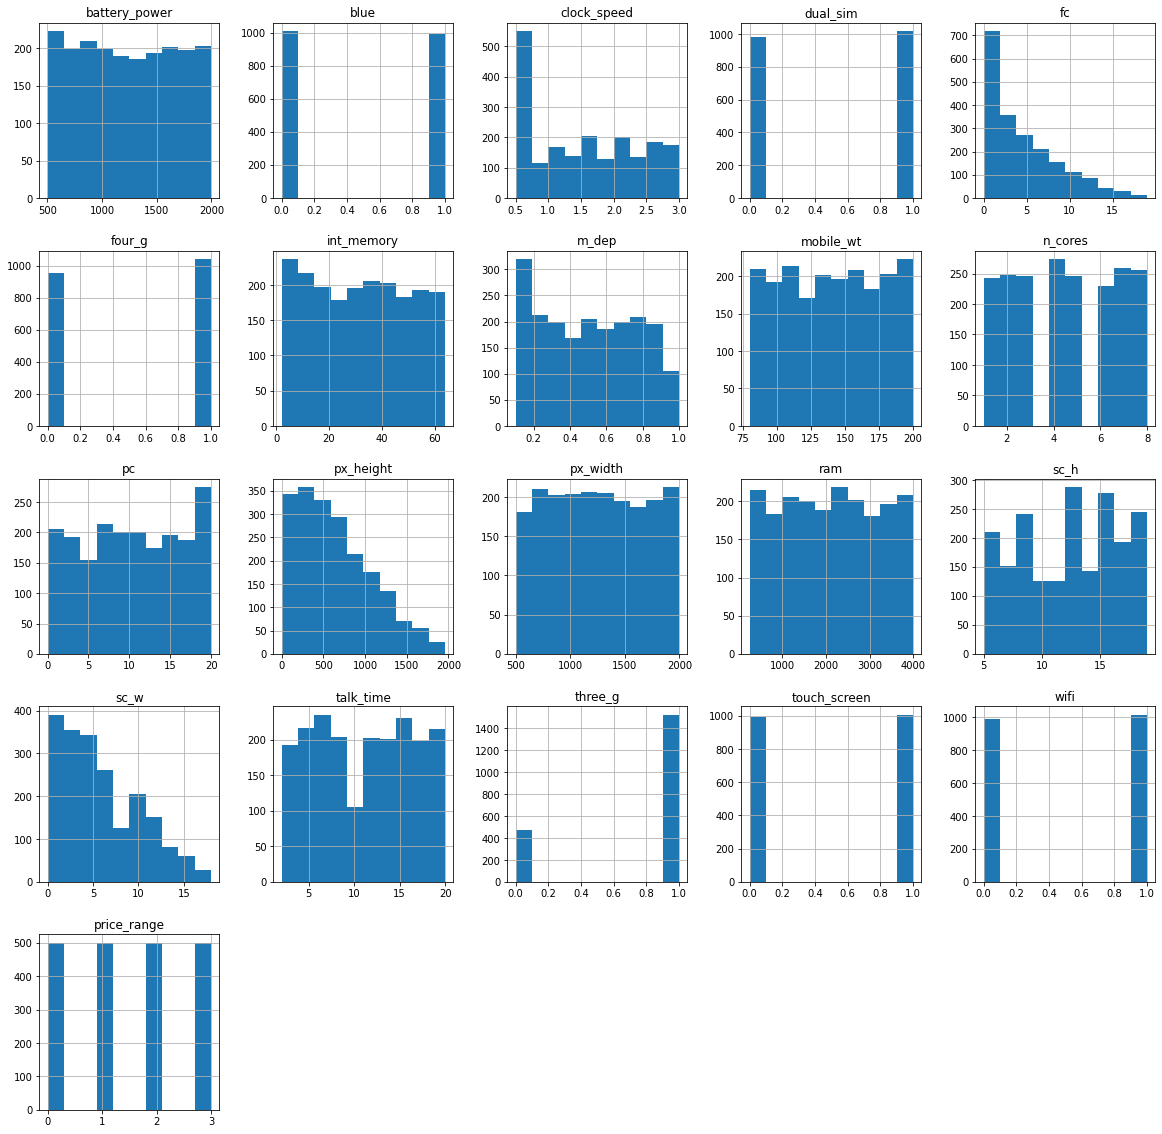

In [9]:
telefones.hist(layout=(5,5), figsize=(20,20))
plt.show()

#### 5. Olhando se há anomalias nos dados

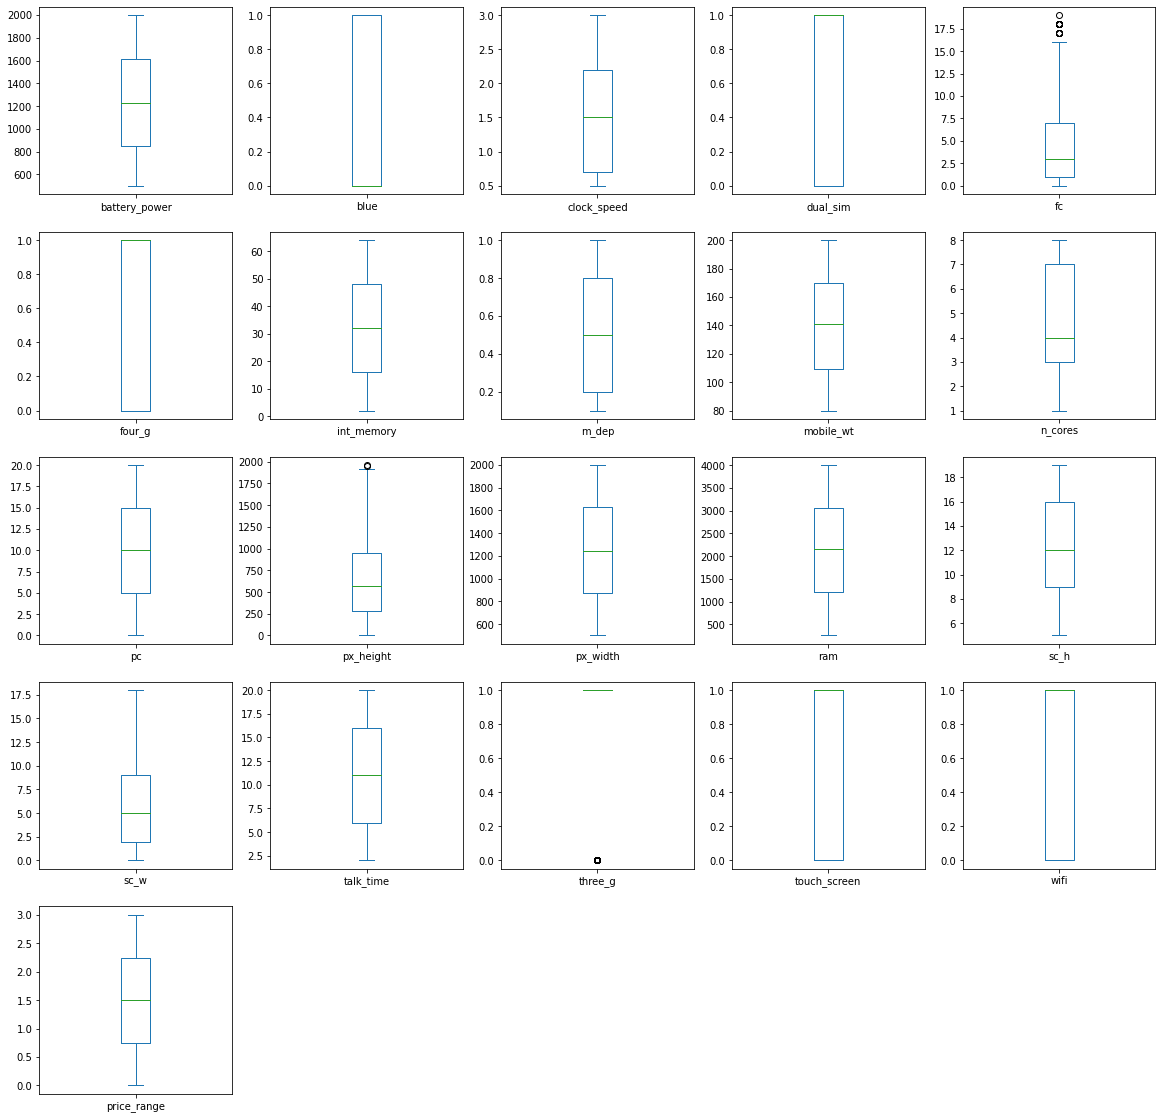

In [10]:
telefones.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

#### 6. Separando os dados em treinamento e teste

In [11]:
telefones_atributos = telefones.drop(['price_range'], axis=1)
telefones_classes = telefones['price_range']

In [12]:
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(telefones_atributos, telefones_classes, test_size=0.1, random_state=10)

#### 7, 8 e 9. Criando o modelo de classificação k-NN e fazendo testes com os valores dos parâmetros

#### O jeito mais simples é trocar os valores dos parâmetros

In [13]:
k_vizinhos = 5
funcao_peso = 'uniform'
algoritmo = 'auto'
classificadorKNN = KNeighborsClassifier(n_neighbors=k_vizinhos, weights=funcao_peso, algorithm=algoritmo)

In [14]:
combinacoes = 10
validacao_cruzada = cross_validate(classificadorKNN, atributos_treino, classes_treino, cv=combinacoes)

#### Verificando a acurácia com os parâmetros selecionados

In [15]:
print('Acurácia do conjunto de teste: ', np.mean(validacao_cruzada['test_score']))

Acurácia do conjunto de teste:  0.9272222222222222


#### Experimentando outros valores dos parâmetros

In [16]:
k_vizinhos = 15
funcao_peso = 'distance'
algoritmo = 'ball_tree'
classificadorKNN = KNeighborsClassifier(n_neighbors=k_vizinhos, weights=funcao_peso, algorithm=algoritmo)

In [17]:
combinacoes = 20
validacao_cruzada = cross_validate(classificadorKNN, atributos_treino, classes_treino, cv=combinacoes)

#### Vendo a nova acurácia

In [18]:
print('Acurácia do conjunto de teste: ', np.mean(validacao_cruzada['test_score']))

Acurácia do conjunto de teste:  0.9394444444444444


#### Uma alternativa é automatizar a verificação dos melhores parâmetros. É possível mudar o número de iterações também, embora isso não esteja sendo solicitado neste exercício.

In [20]:
combinacoes = 5
n_neighbors = [4,5,6,7,8,9,10,15,20,30,40]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree','brute']
parameters = dict(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm )

clf = RandomizedSearchCV(classificadorKNN, parameters, cv = combinacoes, n_iter = 10)
clf.fit(atributos_treino,classes_treino)
print('acurácia: ', clf.best_score_)
print('melhores parâmetros: ', clf.best_params_)
print('melhor classificador: ', clf.best_estimator_)


acurácia:  0.9344444444444443
melhores parâmetros:  {'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}
melhor classificador:  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='distance')


#### Alterando o número de combinações

In [21]:
combinacoes = 20
n_neighbors = [4,5,6,7,8,9,10,15,20,30,40]
weights = ['uniform' , 'distance']
algorithm = ['auto' , 'ball_tree' , 'kd_tree' ,'brute']
parameters = dict(n_neighbors = n_neighbors, weights = weights ,algorithm = algorithm )

clf = RandomizedSearchCV(classificadorKNN, parameters, cv = combinacoes, n_iter = 10)
clf.fit(atributos_treino,classes_treino)
print('acurácia: ', clf.best_score_)
print('melhores parâmetros: ', clf.best_params_)
print('melhor classificador: ', clf.best_estimator_)


acurácia:  0.9394444444444442
melhores parâmetros:  {'weights': 'distance', 'n_neighbors': 30, 'algorithm': 'ball_tree'}
melhor classificador:  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=30, weights='distance')


#### 10. Os resultados acima indicam bons valores de parâmetros para usarmos no treinamento e teste:
* combinações: 20
* k-vizinhos: 15
* função de peso: distance
* algoritmo: ball_tree

In [22]:
classificadorKNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='distance')

#### Treinamento

In [23]:
classificadorKNN.fit(atributos_treino,classes_treino)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='distance')

#### 11. Teste e acurácia

In [24]:
telefones_classes_predicao = classificadorKNN.predict(atributos_teste)
acuracia = accuracy_score(classes_teste, telefones_classes_predicao)
print('Acurácia do classificador: {}'.format(acuracia))

Acurácia do classificador: 0.915


#### Portanto, a acurácia obtida nos dados de teste é de 91,5%